In [5]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
#Read the file

df = pd.read_csv("C:/Users/drvis/OneDrive - Babson College/Documents/Portfolio Python/marketing_AB.csv")

In [9]:
#Check first few observations

df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [15]:
#Check if we have duplicates with respect to user id
df.duplicated(subset = 'user id').sum()

0

In [21]:
#Drop unwanted columns
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [25]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [31]:
#Check if categorical variables have appropiate number of levels
df_cat = df[['test group', 'converted', 'most ads day',
       'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [37]:
#Check if categorical varibales have appropiate levels
for i in df_cat.columns:
    print (i.upper(), ':', df_cat[i].unique())


TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariate Analysis

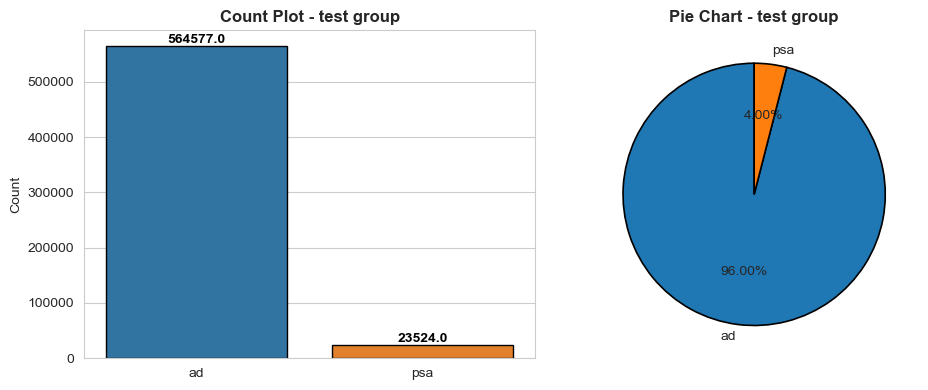

In [105]:
sns.set_style("whitegrid")

variable = 'test group'

plt.figure(figsize=(10, 4))

# Custom color palette
colors = ["#1f77b4", "#ff7f0e"]

# Countplot (Bar Chart)
plt.subplot(1, 2, 1)
ax = sns.countplot(x=variable, data=df_cat, palette=colors, edgecolor="black")
plt.title(f'Count Plot - {variable}', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Pie Chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", 
        colors=colors, startangle=90, wedgeprops={"edgecolor": "black", "linewidth": 1.2})
plt.title(f'Pie Chart - {variable}', fontsize=12, fontweight='bold')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

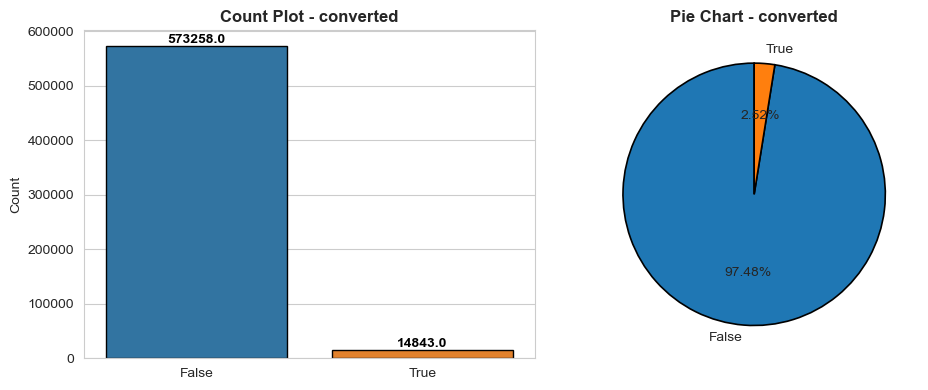

In [109]:
sns.set_style("whitegrid")

variable = 'converted'

# Define a color palette
colors = ["#1f77b4", "#ff7f0e"]

plt.figure(figsize=(10, 4))

# Countplot (Bar Chart)
plt.subplot(1, 2, 1)
ax = sns.countplot(x=variable, data=df_cat, palette=colors, edgecolor="black")
plt.title(f'Count Plot - {variable}', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Pie Chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", 
        colors=colors, startangle=90, wedgeprops={"edgecolor": "black", "linewidth": 1.2})
plt.title(f'Pie Chart - {variable}', fontsize=12, fontweight='bold')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

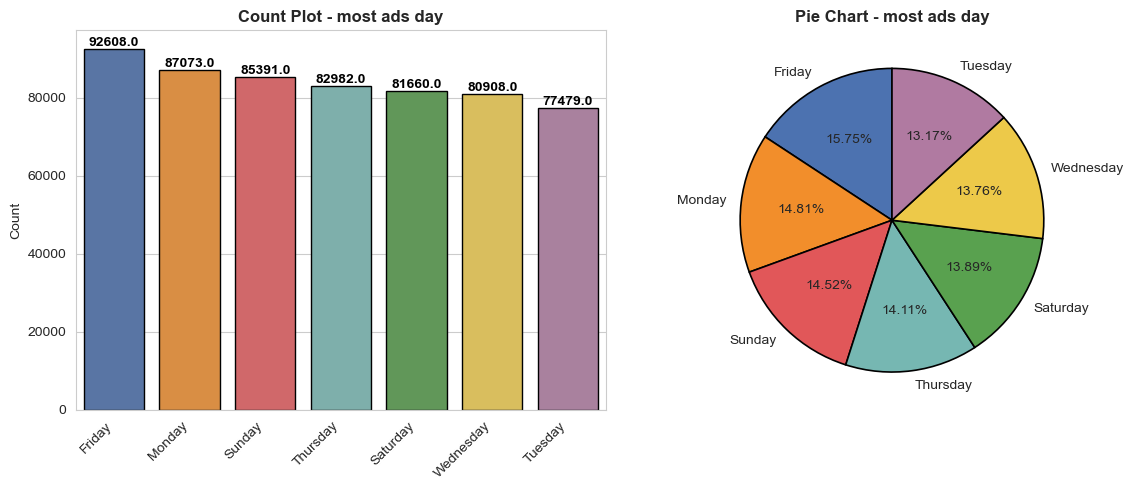

In [111]:
sns.set_style("whitegrid")

variable = 'most ads day'

# Define a color palette
colors = ["#4c72b0", "#f28e2b", "#e15759", "#76b7b2", "#59a14f", "#edc949", "#b07aa1"]

plt.figure(figsize=(12, 5))

# Countplot (Bar Chart)
plt.subplot(1, 2, 1)
ax = sns.countplot(x=variable, data=df_cat, order=df_cat[variable].value_counts().index, palette=colors, edgecolor="black")
plt.title(f'Count Plot - {variable}', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Pie Chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", 
        colors=colors, startangle=90, wedgeprops={"edgecolor": "black", "linewidth": 1.2})
plt.title(f'Pie Chart - {variable}', fontsize=12, fontweight='bold')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

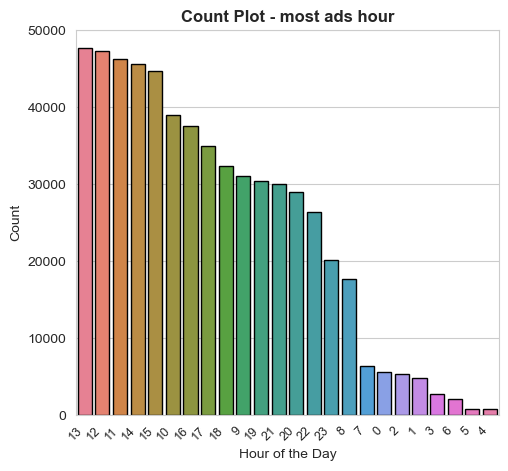

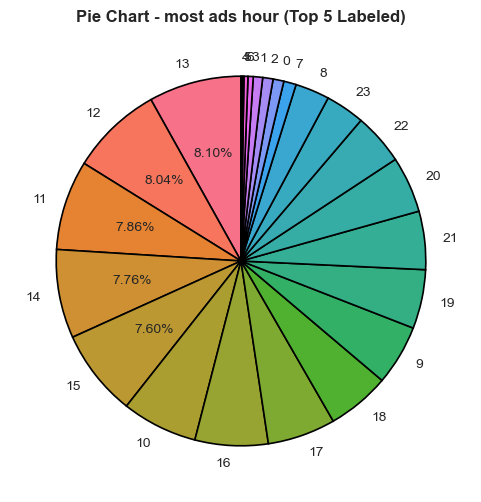

In [129]:
sns.set_style("whitegrid")

variable = 'most ads hour'

# Define a color palette
colors = sns.color_palette("husl", n_colors=len(df_cat[variable].unique()))

plt.figure(figsize=(12, 5))

# Countplot (Bar Chart)
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order=df_cat[variable].value_counts().index, 
              palette=colors, edgecolor="black")
plt.title(f'Count Plot - {variable}', fontsize=12, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right", fontsize=9)

# Get value counts
counts = df_cat[variable].value_counts()

# Select top 5 categories
top_categories = counts[:5].index  

# Define a function to show labels only for the top 5
def autopct_format(pct, all_values):
    absolute = int(round(pct/100.*sum(all_values)))  
    return f"{pct:.2f}%" if absolute in counts[top_categories].values else ""

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct=lambda p: autopct_format(p, counts), 
        colors=colors, startangle=90, wedgeprops={"edgecolor": "black", "linewidth": 1.2})

# Add title
plt.title(f'Pie Chart - {variable} (Top 5 Labeled)', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

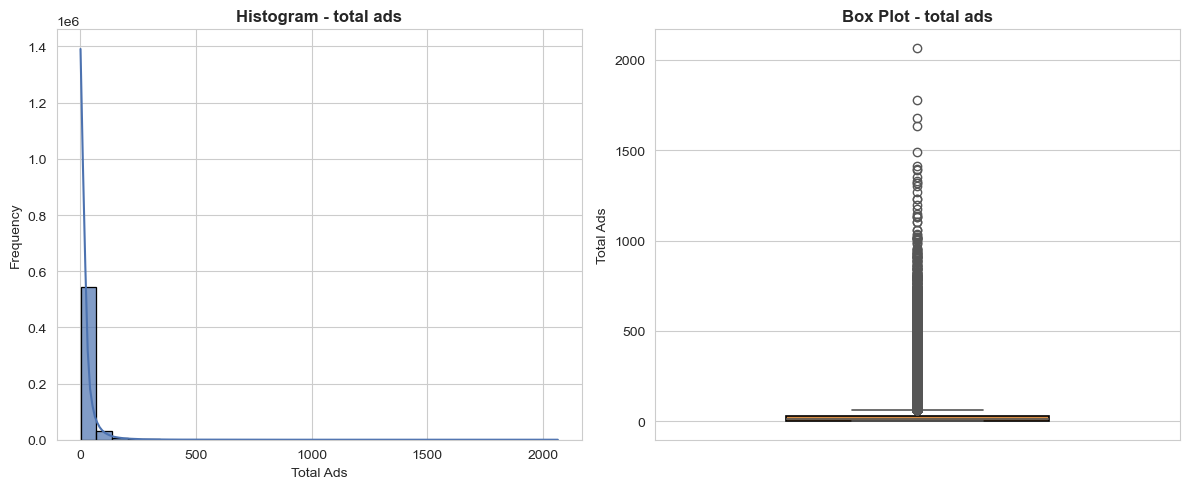

In [117]:
sns.set_style("whitegrid")

variable = 'total ads'

# Define color palette
hist_color = "#4c72b0"  # Muted blue for histogram
box_color = "#f28e2b"   # Warm orange for boxplot

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df, bins=30, kde=True, color=hist_color, edgecolor="black", alpha=0.7)
plt.title(f'Histogram - {variable}', fontsize=12, fontweight='bold')
plt.xlabel('Total Ads', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df, color=box_color, width=0.5, linewidth=1.2, boxprops=dict(edgecolor="black"))
plt.title(f'Box Plot - {variable}', fontsize=12, fontweight='bold')
plt.ylabel('Total Ads', fontsize=10)

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

In [67]:
#Descriptive Analysis for Total Ads
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

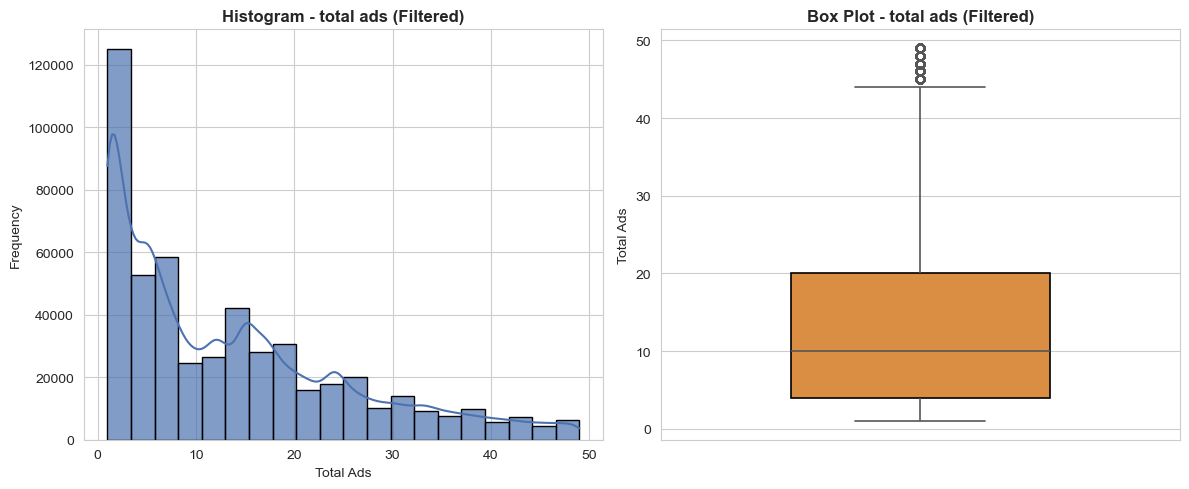

In [119]:
sns.set_style("whitegrid")

variable = 'total ads'
filtered_df = df[df[variable] < 50]  # Filtered data

# Define color palette
hist_color = "#4c72b0"  # Muted blue for histogram
box_color = "#f28e2b"   # Warm orange for boxplot

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=filtered_df, bins=20, kde=True, color=hist_color, edgecolor="black", alpha=0.7)
plt.title(f'Histogram - {variable} (Filtered)', fontsize=12, fontweight='bold')
plt.xlabel('Total Ads', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=filtered_df, color=box_color, width=0.5, linewidth=1.2, boxprops=dict(edgecolor="black"))
plt.title(f'Box Plot - {variable} (Filtered)', fontsize=12, fontweight='bold')
plt.ylabel('Total Ads', fontsize=10)

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

## Bivariate Analysis

In [74]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [76]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Figure size 800x500 with 0 Axes>

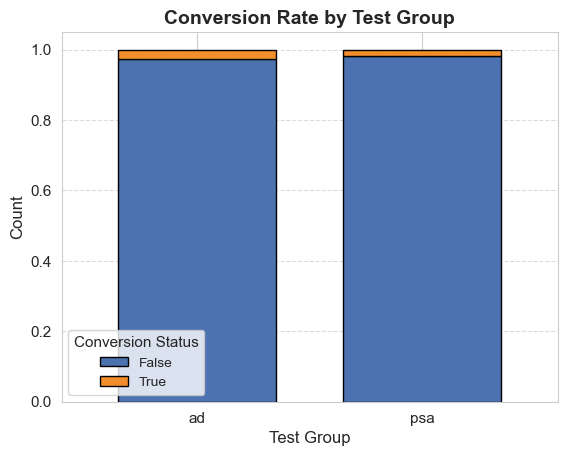

In [121]:
sns.set_style("whitegrid")

# Define colors for the stacked bars
colors = ["#4c72b0", "#f28e2b"]

# Create the figure
plt.figure(figsize=(8, 5))

# Plot the stacked bar chart with improved aesthetics
ct_conversion_test_group.plot(kind="bar", stacked=True, color=colors, edgecolor="black", width=0.7)

# Add titles and labels
plt.title("Conversion Rate by Test Group", fontsize=14, fontweight='bold')
plt.xlabel("Test Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Conversion Status", fontsize=10, title_fontsize=11)

# Add gridlines for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

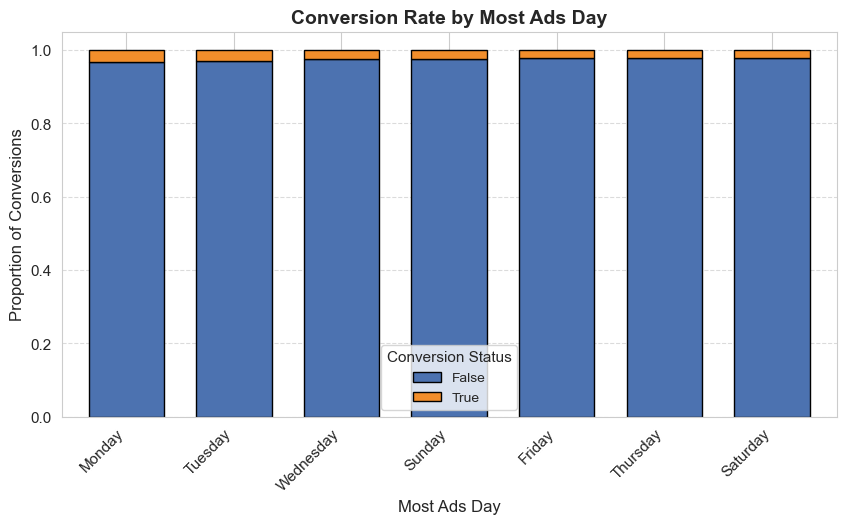

In [123]:
sns.set_style("whitegrid")

# Compute the normalized crosstab
ct_conversion_hour = pd.crosstab(df['most ads day'], df['converted'], normalize='index')

# Sort values for better visualization
ct_conversion_hour = ct_conversion_hour.sort_values(by=True, ascending=False)

# Define colors for the stacked bars
colors = ["#4c72b0", "#f28e2b"]

# Create the figure
plt.figure(figsize=(10, 5))

# Plot the stacked bar chart with improved aesthetics
ct_conversion_hour.plot(kind="bar", stacked=True, color=colors, edgecolor="black", width=0.7, ax=plt.gca())

# Add titles and labels
plt.title("Conversion Rate by Most Ads Day", fontsize=14, fontweight='bold')
plt.xlabel("Most Ads Day", fontsize=12)
plt.ylabel("Proportion of Conversions", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Conversion Status", fontsize=10, title_fontsize=11)

# Add gridlines for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

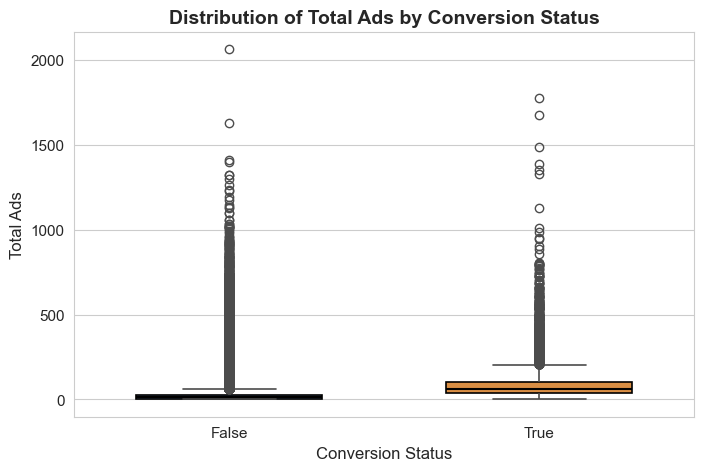

In [125]:
sns.set_style("whitegrid")

# Define color palette
box_color = ["#4c72b0", "#f28e2b"]  # Muted blue & warm orange

# Create the figure
plt.figure(figsize=(8, 5))

# Boxplot
sns.boxplot(x='converted', y='total ads', data=df, palette=box_color, width=0.6, linewidth=1.2, 
            boxprops=dict(edgecolor="black"), medianprops=dict(color="black", linewidth=1.5))

# Add titles and labels
plt.title("Distribution of Total Ads by Conversion Status", fontsize=14, fontweight='bold')
plt.xlabel("Conversion Status", fontsize=12)
plt.ylabel("Total Ads", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Show the plot
plt.show()

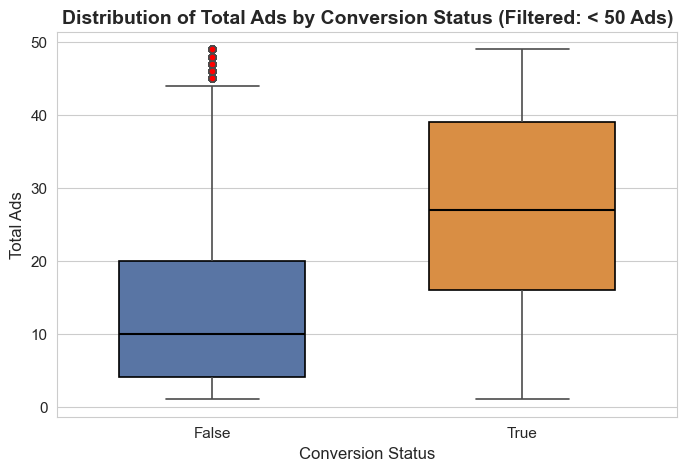

In [127]:
sns.set_style("whitegrid")

# Define color palette
box_color = ["#4c72b0", "#f28e2b"]  # Muted blue & warm orange

# Create the figure
plt.figure(figsize=(8, 5))

# Boxplot (filtered for total ads < 50)
sns.boxplot(x='converted', y='total ads', data=df[df['total ads'] < 50], palette=box_color, width=0.6, 
            linewidth=1.2, boxprops=dict(edgecolor="black"), medianprops=dict(color="black", linewidth=1.5),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))

# Add titles and labels
plt.title("Distribution of Total Ads by Conversion Status (Filtered: < 50 Ads)", fontsize=14, fontweight='bold')
plt.xlabel("Conversion Status", fontsize=12)
plt.ylabel("Total Ads", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Show the plot
plt.show()

## Statistical Tests

In [97]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        #create contingency table
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        # Perform chi square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Display the results
        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        # Check for significance
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically sgnificant.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")
        


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically sgnificant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically sgnificant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically sgnificant.


In [99]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [101]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#Step 1: Check assumptions
#Normality Tests
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

#Equality of variance assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")


Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = 0.0


In [103]:
#Step 2: Perform a suitable test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    #Assumption met- use t test for means
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Independant two sample t-test: p-value = {t_p_value}")

else:
    #Assumption not met- use Mann Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann Whitney U test: p-value = {u_p_value}")


Mann Whitney U test: p-value = 0.0
